In [1]:
#Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1. Escreva um código em VBA, R ou Python que reúna os três arquivos em um único banco de dados

#importar as tabelas
ava = pd.read_excel('Avaliaes.xlsx')
cat = pd.read_excel('CategoriaePreo.xlsx')
nome = pd.read_excel('NomesePublicaes.xlsx')

#reuno as tabales em um mesmo data frame
m = pd.merge(ava, nome, how = 'left')
m2 = pd.merge(m, cat, how = 'left')

#organizo as colunas do dataframe anterior m2 e aloco em banco_de_dados
banco_de_dados = m2[['ID', 'Name', 'Price', 'Category', 'Rating', 'No of people Rated', 'Date']]

#banco_de_dados #para visualizar o Dataframe

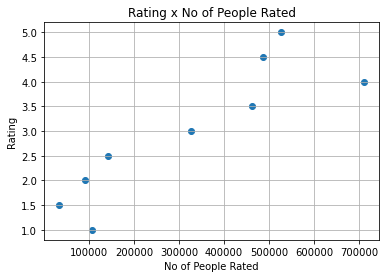

In [3]:
#2. Existe relação entre a avaliação dos aplicativos e a quantidade de avaliações? E entre a data
#de publicação e as avaliações? Os aplicativos pagos são melhor avaliados?

#2.1 Entre avaliação dos aplicativos e a quantidade de avaliações?

#Aloco em ex21 o dataframe com as colunas No of people Rated e Rating, agrupo com groupby os ratings iguais,
#somo para saber quantos votos tem por rating e por fim utilizo o comando reset_index para
#criar indíces em ex21 que foram ''perdidos'' no groupby
ex21 = banco_de_dados[['No of people Rated','Rating',]].groupby(['Rating']).sum().reset_index()
#um gráfico para visualização
plt.scatter(ex21[['No of people Rated']],ex21[['Rating']])
plt.title("Rating x No of People Rated")
plt.xlabel("No of People Rated")
plt.ylabel("Rating")
plt.grid(True)
plt.savefig('Gráfico_ex21.png')
plt.show()

In [4]:
#função que calcula corelação (padrão é o método de Pearson)
ex21.corr()

,Rating,No of people Rated
Rating,1.000000,0.879948
No of people Rated,0.879948,1.000000


<ipython-input-5-e45f50426ea2>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  media1.append(ex22[ex22['Date'].dt.year==(2010+j)].mean()[0])
<ipython-input-5-e45f50426ea2>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  media1.append(ex22[ex22['Date'].dt.year==(2010+j)].mean()[0])
<ipython-input-5-e45f50426ea2>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  media1.append(ex22[ex22['Date'].dt.year==(2010+j)].mean()[0])
<ipython-input-5-e45f50426ea2>:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  media1.append(ex22[ex22['Date'].dt.year==(2010+j)].mean()[0])
<ipython-input-5-e45f50426ea

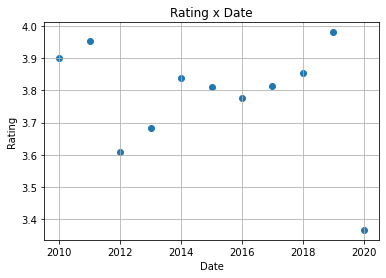

In [5]:
#2.2 Entre a data de publicação e as avaliações?

#Crio um novo dataframe no qual eu separei em uma coluna os anos (2010 até 2020) e
#em outra coluna eu organizo as médias de rating relacionada em cada ano.
#primeiro aloco em ex22 as colunas que iremos utilizar
ex22 = banco_de_dados[['Date','Rating']] 
#Crio a lista dos anos
data1=[]
for k in range(0,11,1):
    data1.append(2010+k)

#Crio a lista das médias    
media1=[]
for j in range(0,11,1):
    media1.append(ex22[ex22['Date'].dt.year==(2010+j)].mean()[0])

#Aloco o dataframe
df22=pd.DataFrame({'Date':data1,'Mean':media1})

#df22 #comando para checar o dataframe

#um gráfico para visualização
plt.scatter(df22[['Date']],df22[['Mean']])
plt.title("Rating x Date")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.grid(True)
plt.savefig('Gráfico_ex22.png')
plt.show()


In [6]:
#função corr() para calcular a correlação (padrão é o método de Pearson)
df22.corr()

,Date,Mean
Date,1.000000,-0.279488
Mean,-0.279488,1.000000


In [7]:
#2.3 Os aplicativos pagos são melhor avaliados? 

#Separo as colunas de interesse e aloco em ex23
ex23 = banco_de_dados[['Price','Rating']]

#Utilizo o comando .str.contains para filtrar os preços
#na primeira linha são selecionados todas as linhas na coluna Price que tenha o valor Free e aloco em ex23_free
#na segunda linha são selecionados todas as linhas na coluna Price que não tenha o valor Free (tenha algum preço)
#e aloc oem ex23_nofree
ex23_free = ex23[ex23["Price"].str.contains("Free")==True]
ex23_nofree = ex23[ex23["Price"].str.contains("Free")==False]

#Para saber qual dos dois grupos são melhores avaliados eu calculei a média dos ratings e faço um comparativo entre elas
#quando a média de rating de ex23_free for maior que a média de rating do ex23_nofree, os aplicativos de graça são melhores 
#avaliados ou quando a média de ex23_nofree for maior que a média de ex23_free, os aplicativos pagos são melhores avaliados
if ex23_free.mean()[0] > ex23_nofree.mean()[0]:
    print("A média do Rating dos aplicativos Free é de {} e a média do Rating dos aplicativos pagos é de {}, portanto os \
aplicativos  Free são mais bem avaliados".format(np.round(ex23_free.mean(), 2)[0],np.round(ex23_nofree.mean(),2)[0]))
if ex23_nofree.mean()[0] > ex23_free.mean()[0]:
    print("A média do Rating dos aplicativos Free é de {} e a média do Rating dos aplicativos pagos é de {}, portanto os \
aplicativos  pagos são mais bem avaliados".format(np.round(ex23_free.mean(), 2)[0],np.round(ex23_nofree.mean(),2)[0]))

A média do Rating dos aplicativos Free é de 3.83 e a média do Rating dos aplicativos pagos é de 2.43, portanto os aplicativos  Free são mais bem avaliados
